# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_df = pd.merge(mouse_metadata,study_results)

# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

num_mice = 0
mice_list = []

for m in mouse_df['Mouse ID']:
    if m not in mice_list:
        num_mice += 1
        mice_list.append(m)
print(num_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = mouse_df[mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

ids_list = []

for id in duplicate_rows['Mouse ID']:
    if id not in ids_list:
        ids_list.append(id)
        print(f'Duplicate mouse is Mouse ID: {id}')

Duplicate mouse is Mouse ID: g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_df[mouse_df['Mouse ID'] != 'g989']

#reset index
mouse_df.reset_index(drop=True, inplace=True)

mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = 0
mice_list = []

for m in mouse_df['Mouse ID']:
    if m not in mice_list:
        num_mice += 1
        mice_list.append(m)
print(num_mice)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

import numpy as np

grouped_data = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

mean_tumor_volume = grouped_data.mean()

median_tumor_volume = grouped_data.median()

variance_tumor_volume = grouped_data.var()

std_dev_tumor_volume = grouped_data.std()

std_error_tumor_volume = grouped_data.apply(lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))

summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume Std. Error': std_error_tumor_volume
})


summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


def std_error(x):
    return np.std(x, ddof=1) / np.sqrt(len(x))


summary_statistics = mouse_df.groupby('Drug Regimen').agg(
    Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Median_Tumor_Volume=('Tumor Volume (mm3)', 'median'),
    Tumor_Volume_Variance=('Tumor Volume (mm3)', 'var'),
    Tumor_Volume_Std_Dev=('Tumor Volume (mm3)', 'std'),
    Tumor_Volume_Std_Error=('Tumor Volume (mm3)', std_error)
)


summary_statistics

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

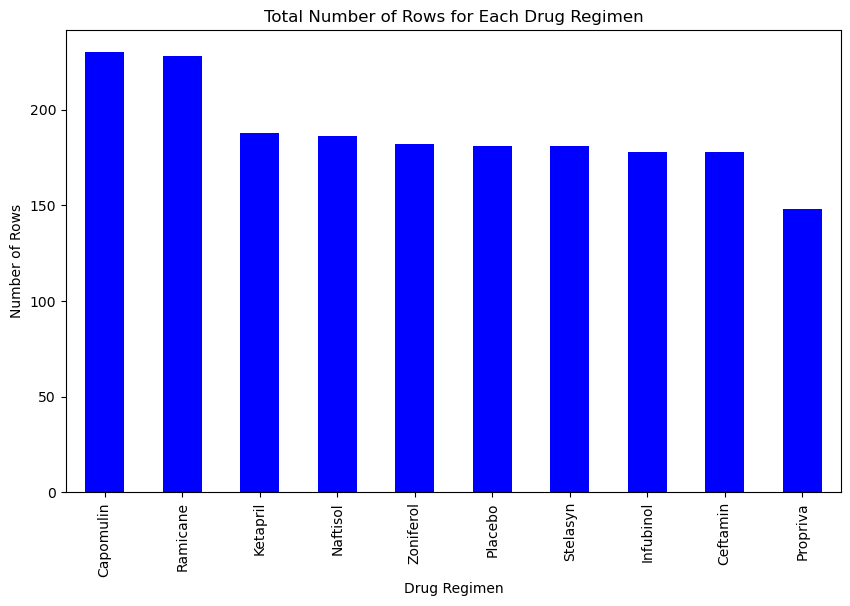

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_counts = mouse_df['Drug Regimen'].value_counts()


drug_regimen_counts.plot(kind='bar', figsize=(10, 6), color='blue')


plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Show the plot
plt.show()

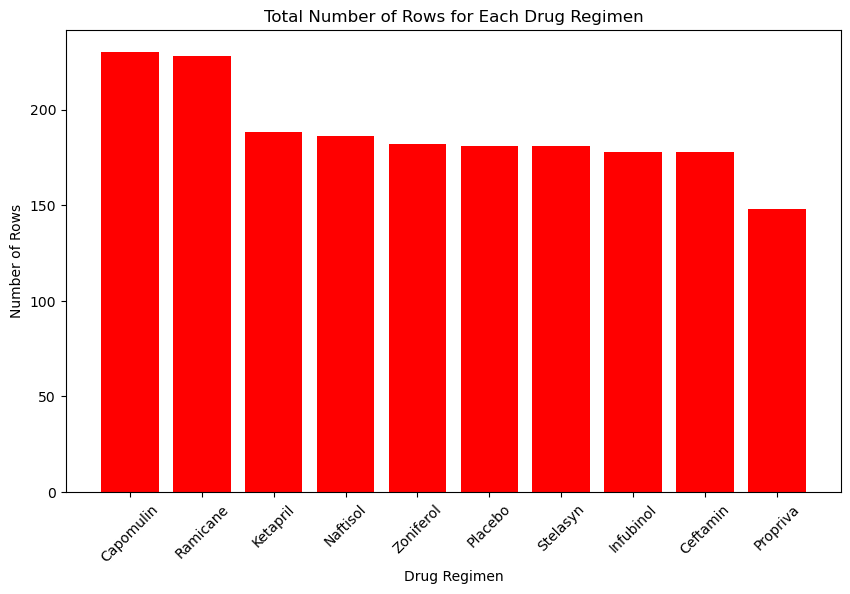

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = mouse_df['Drug Regimen'].value_counts()


drug_regimens = drug_regimen_counts.index
counts = drug_regimen_counts.values


plt.figure(figsize=(10, 6))
plt.bar(drug_regimens, counts, color='red')


plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')


plt.xticks(rotation=45)



plt.show()

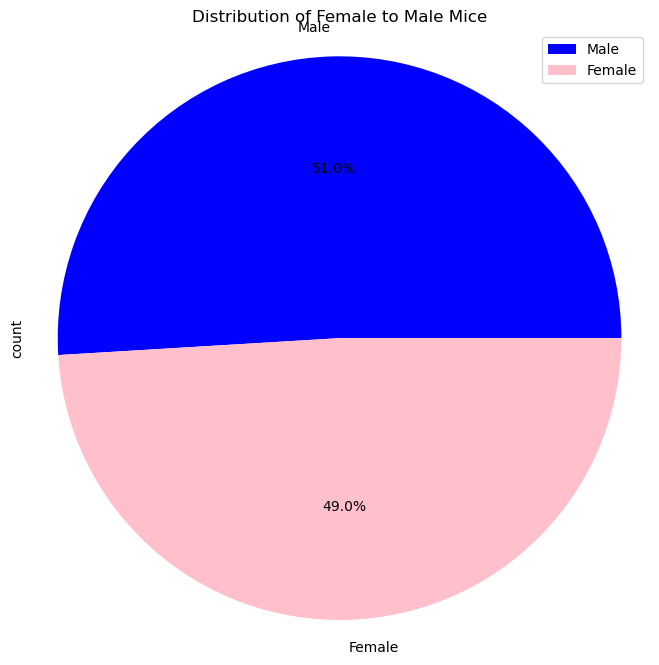

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = mouse_df['Sex'].value_counts()


plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink'])


plt.title('Distribution of Female to Male Mice')


plt.legend(gender_counts.index, loc='upper right')


plt.axis('equal')


plt.show()

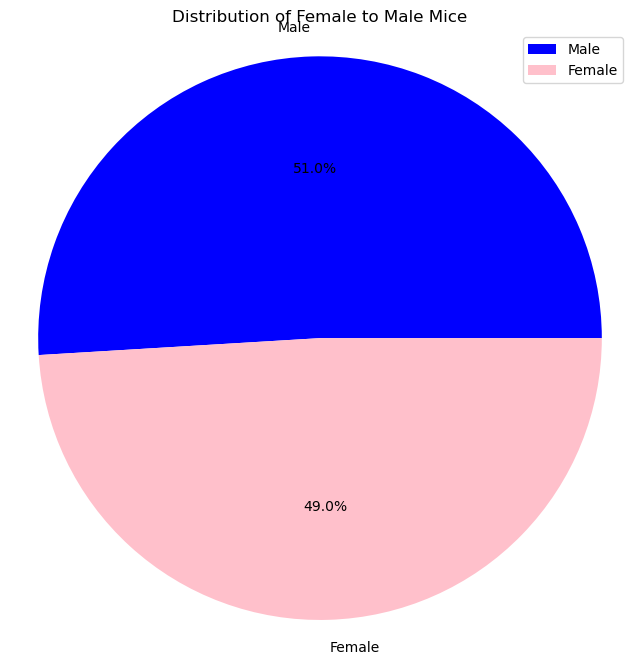

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = mouse_df['Sex'].value_counts()


genders = gender_counts.index
counts = gender_counts.values


plt.figure(figsize=(8, 8))
plt.pie(counts, labels=genders, autopct='%1.1f%%', colors=['blue', 'pink'])

plt.title('Distribution of Female to Male Mice')

plt.legend(genders, loc='upper right')

plt.axis('equal')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint_idx = mouse_df.groupby('Mouse ID')['Timepoint'].idxmax()

# Pulling highest timepoint row for each mouse
result_df = mouse_df.loc[max_timepoint_idx]

#Rename tumor volume to Max Tumor Volume
result_df.rename(columns={'Tumor Volume (mm3)': 'Max Tumor Volume (mm3)'}, inplace=True)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = pd.merge(mouse_df, result_df[['Mouse ID', 'Timepoint', 'Max Tumor Volume (mm3)']], on=['Mouse ID', 'Timepoint'], how='inner')

# Drop duplicate columns

merged_df.drop(merged_df.filter(regex='_y$').columns.tolist(), axis=1, inplace=True)

merged_df.drop('Tumor Volume (mm3)', axis=1, inplace=True)

merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites,Max Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,45,1,22.050126
1,s185,Capomulin,Female,3,17,45,1,23.343598
2,x401,Capomulin,Female,16,15,45,0,28.484033
3,m601,Capomulin,Male,22,17,45,1,28.430964
4,g791,Ramicane,Male,11,16,45,1,29.128472
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,0,45.934712
244,z435,Propriva,Female,12,26,10,0,48.710661
245,z581,Infubinol,Female,24,25,45,3,62.754451
246,z795,Naftisol,Female,13,29,45,3,65.741070


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Max Tumor Volume (mm3)']
    tumor_vol_data.append(drug_df)
    
    
    # Quartiles for IQR
    quartiles = drug_df.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    
    # Determine outliers using upper and lower bounds

    
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    

    outliers = drug_df[(drug_df < lower_bound) | (drug_df > upper_bound)]
    
    # Print drug info
    print(f"Drug: {drug}")
    print(f"  Lower Quartile: {lower_quartile}")
    print(f"  Upper Quartile: {upper_quartile}")
    print(f"  IQR: {iqr}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Potential Outliers: {outliers.tolist()}\n")

Drug: Capomulin
  Lower Quartile: 32.37735684
  Upper Quartile: 40.1592203
  IQR: 7.781863460000004
  Lower Bound: 20.70456164999999
  Upper Bound: 51.83201549
  Potential Outliers: []

Drug: Ramicane
  Lower Quartile: 31.56046955
  Upper Quartile: 40.65900627
  IQR: 9.098536719999998
  Lower Bound: 17.912664470000003
  Upper Bound: 54.30681135
  Potential Outliers: []

Drug: Infubinol
  Lower Quartile: 54.04860769
  Upper Quartile: 65.52574285
  IQR: 11.477135160000003
  Lower Bound: 36.83290494999999
  Upper Bound: 82.74144559000001
  Potential Outliers: [36.3213458]

Drug: Ceftamin
  Lower Quartile: 48.72207785
  Upper Quartile: 64.29983003
  IQR: 15.577752179999997
  Lower Bound: 25.355449580000002
  Upper Bound: 87.66645829999999
  Potential Outliers: []



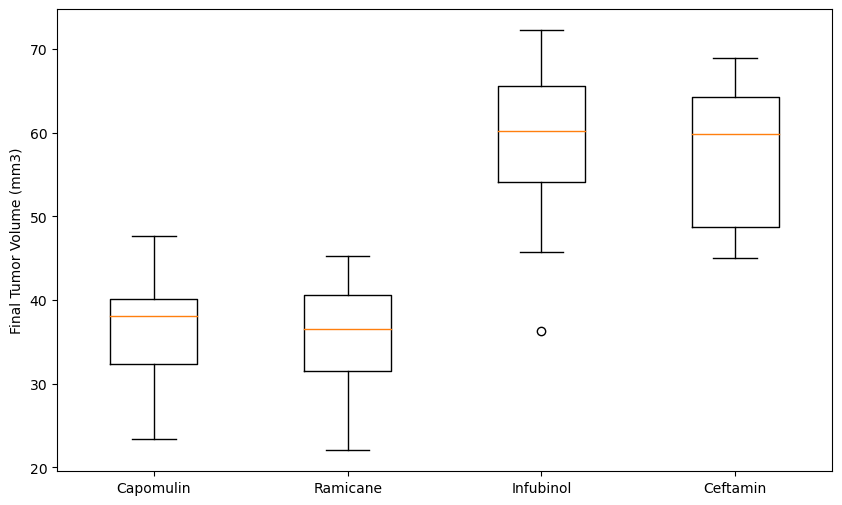

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tumor_volume_by_drug = [merged_df[merged_df['Drug Regimen'] == drug]['Max Tumor Volume (mm3)'].tolist() for drug in treatments]


plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_by_drug, labels=treatments)

plt.ylabel('Final Tumor Volume (mm3)')



plt.show()

## Line and Scatter Plots

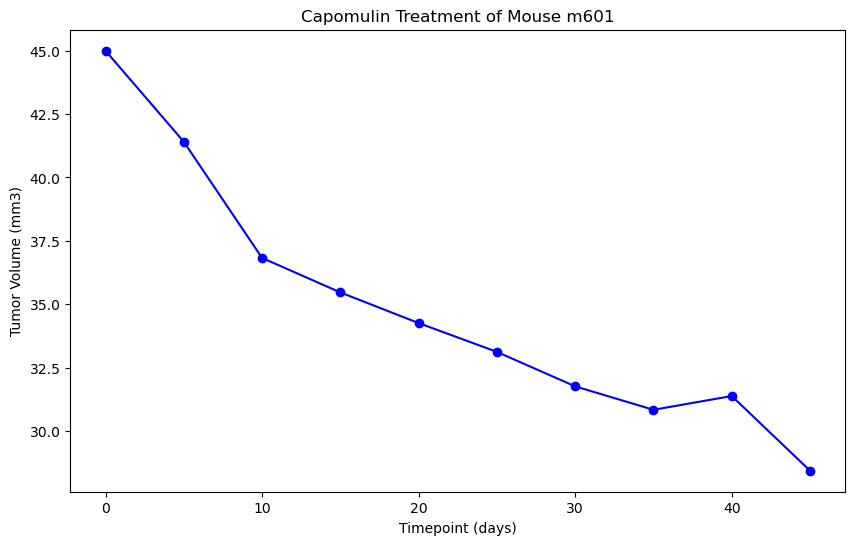

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_m601_df = mouse_df[mouse_df['Mouse ID'] == 'm601']

plt.figure(figsize=(10, 6))
plt.plot(mouse_m601_df['Timepoint'], mouse_m601_df['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')
plt.title('Capomulin Treatment of Mouse m601')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')


plt.show()

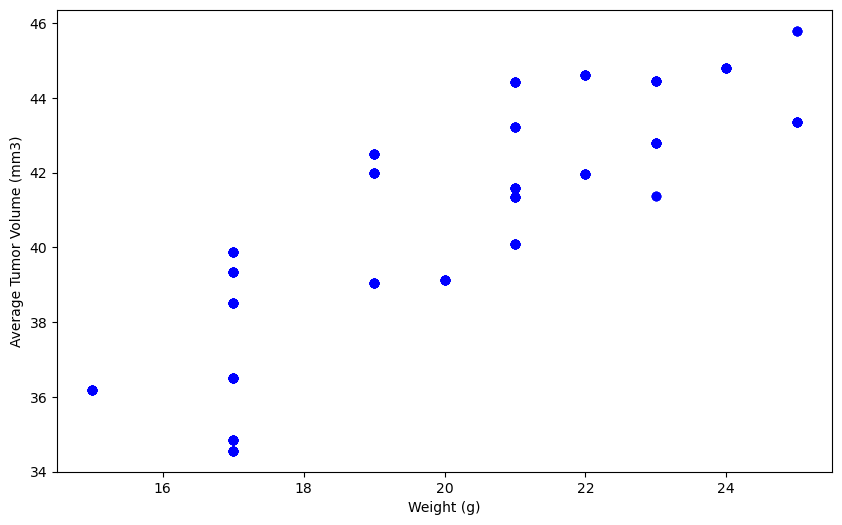

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = mouse_df[mouse_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID for mean volume
avg_tumor_volume_by_mouse = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge with mouse_df for weight data
avg_tumor_volume_by_mouse = pd.merge(avg_tumor_volume_by_mouse, capomulin_df[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left')

# Plot Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume_by_mouse['Weight (g)'], avg_tumor_volume_by_mouse['Tumor Volume (mm3)'], color='b')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


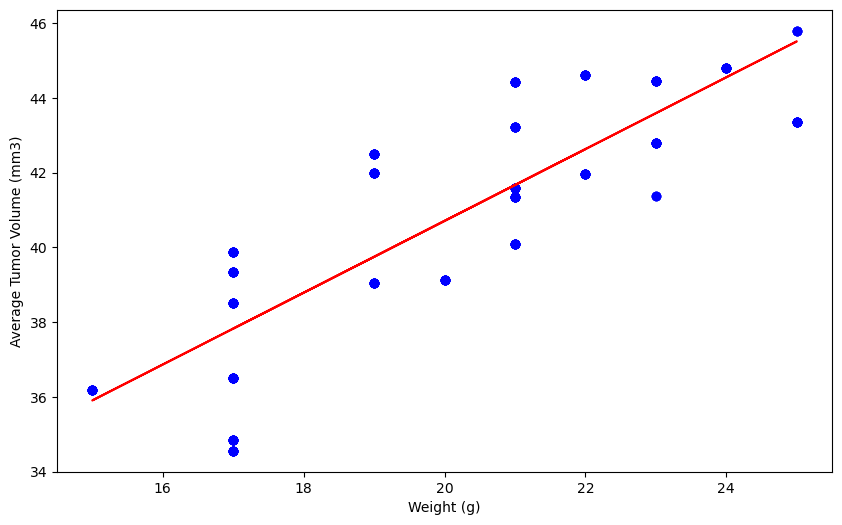

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Only mice taking Capomulin
capomulin_df = mouse_df[mouse_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID for average volume
avg_tumor_volume_by_mouse = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge with mouse_df for weight data
avg_tumor_volume_by_mouse = pd.merge(avg_tumor_volume_by_mouse, capomulin_df[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left')

# Get weight and tumor volume data
weight_data = avg_tumor_volume_by_mouse['Weight (g)']
tumor_volume_data = avg_tumor_volume_by_mouse['Tumor Volume (mm3)']

# Calculate linear regression line
slope, intercept = np.polyfit(weight_data, tumor_volume_data, 1)
linear_regression_line = slope * weight_data + intercept

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(weight_data, tumor_volume_data)[0, 1]

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(weight_data, tumor_volume_data, color='b', label='Data Points')

# Linear Regression line
plt.plot(weight_data, linear_regression_line, color='r')


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}')

# Show the plot
plt.show()
